<a href="https://colab.research.google.com/github/corinaccqf/unsupervised-learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DBSCAN**

In this topic, you’ll learn about another popular clustering method: density-based spatial clustering of applications with noise (DBSCAN). K-means and hierarchical clustering are good at finding circular (or convex) clusters, which makes them great tools for identifying well-separated clusters. But, unfortunately, they’re not good at identifying clusters that are not well separated or that have nonconvex shapes such as rings inside rings.

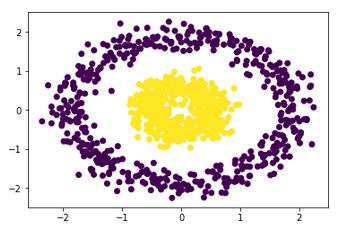

Here, you’ll explore the DBSCAN algorithm, which can find clusters of any arbitrary shape. Here’s how DBSCAN compares to k-means and hierarchical clustering:

*        DBSCAN does not require you to specify the number of clusters.
*        DBSCAN can find clusters of any shape.
*        DBSCAN is highly efficient and scales better than k-means and hierarchical clustering.
*        DBSCAN can also identify outliers in the data, which means that it isn’t sensitive to outliers.


## **What is DBSCAN?**

DBSCAN, as its name implies, is a density-based clustering algorithm. Here, density refers to the concentration and closeness of datapoints in a cluster. In a nutshell, DBSCAN divides the observations into subgroups of high-density regions.

As we said before, DBSCAN doesn't require us to specify the number of clusters, but we do need to tune two hyperparameters: epsilon (ϵ) and minPts. ϵ defines the radius within which to search for nearby neighbors. We can imagine each data point having a circle with radius ϵ drawn around it. minPts is the minimum number of points required to form a cluster. Using ϵ And minPts, we can assign each data point to one of the following three types:


*   **Core point:** A point that has at least a minimum number of other points (minPts) within its ϵneighborhood.

*  **Border point:** A point that is within the ϵ neighborhood of a core point with less than the minimum number of other points (minPts) within its own ϵ
 neighborhood.
*  **Noise point:** A point that is neither a core point nor a border point.


In the image below, we see the three types of points: The blue points are the core points, the black points are the border points, and the white points are the noise points.



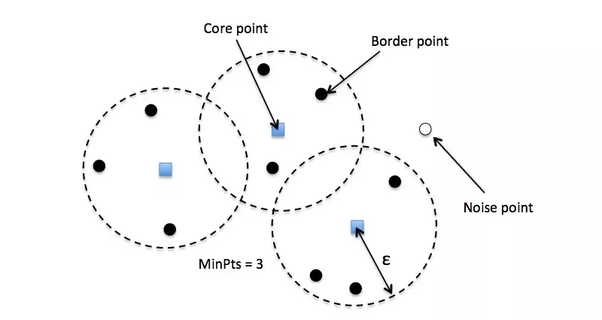

## The algorithm
The DBSCAN algorithm is simple. It repeats the following process until all points have been assigned to a cluster or are labeled as visited:



1.   Select a point p randomly.
2.   Get all points in the ϵ neighborhood of p.
3.   If p is a core point, form a cluster. Recursively find all its connected points in the ϵ neighborhood and assign them to the same cluster as p.
4.    If p is not a core point, iterate over the unvisited points in the dataset.


Below, we see the DBSCAN algorithm in action in a well-separated space of the clusters:

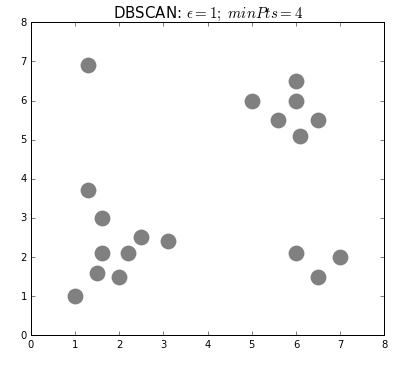

As we highlighted before, DBSCAN can also identify circular clusters. Below, we demonstrate how DBSCAN can work through this problem:

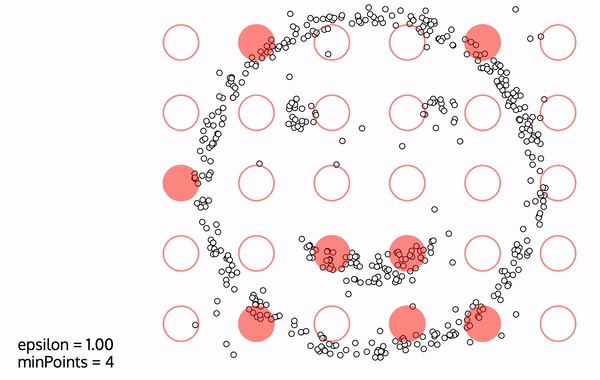

If you want to experiment with how DBSCAN performs on different datasets, check out this interactive web site.https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Speed
DBSCAN is one of the most efficient and speediest clustering algorithms. It iterates over each of the n observations we have in the dataset. In each iteration, it finds the observations that are in the ϵ neighborhood of the observation. Hence, its time complexity is O(n2).This makes DBSCAN scale more efficiently than k-means or hierarchical clustering. Because of this, DBSCAN is one of the first algorithms to try, especially in exploratory data analysis and open-ended research.

## **DBSCAN in action**

Now, let's see how DBSCAN performs on the Iris dataset we used in the previous checkpoints. Scikit-learn provides us the DBSCAN algorithm from its cluster module. So, we can use it by importing from sklearn.cluster import DBSCAN.

We first import the packages we use:

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

It's important to scale variables before clustering so we standardize our features first:

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Next, we run DBSCAN algorithm on the standardized data. The parameters of the DBSCAN class are eps and min_samples. eps refers to ϵ and min_samples refers to the minPts we previously discussed. We have initially set them as eps=1 and min_samples=5, but you can try other values and search for the best ones.

In [3]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

Now, we can visualize how DBSCAN assigned clusters to the observations by using the first two principal components of our data. In the plot below, the numbers show the cluster each observation has been assigned to by the algorithm. The colors denote the true classes.

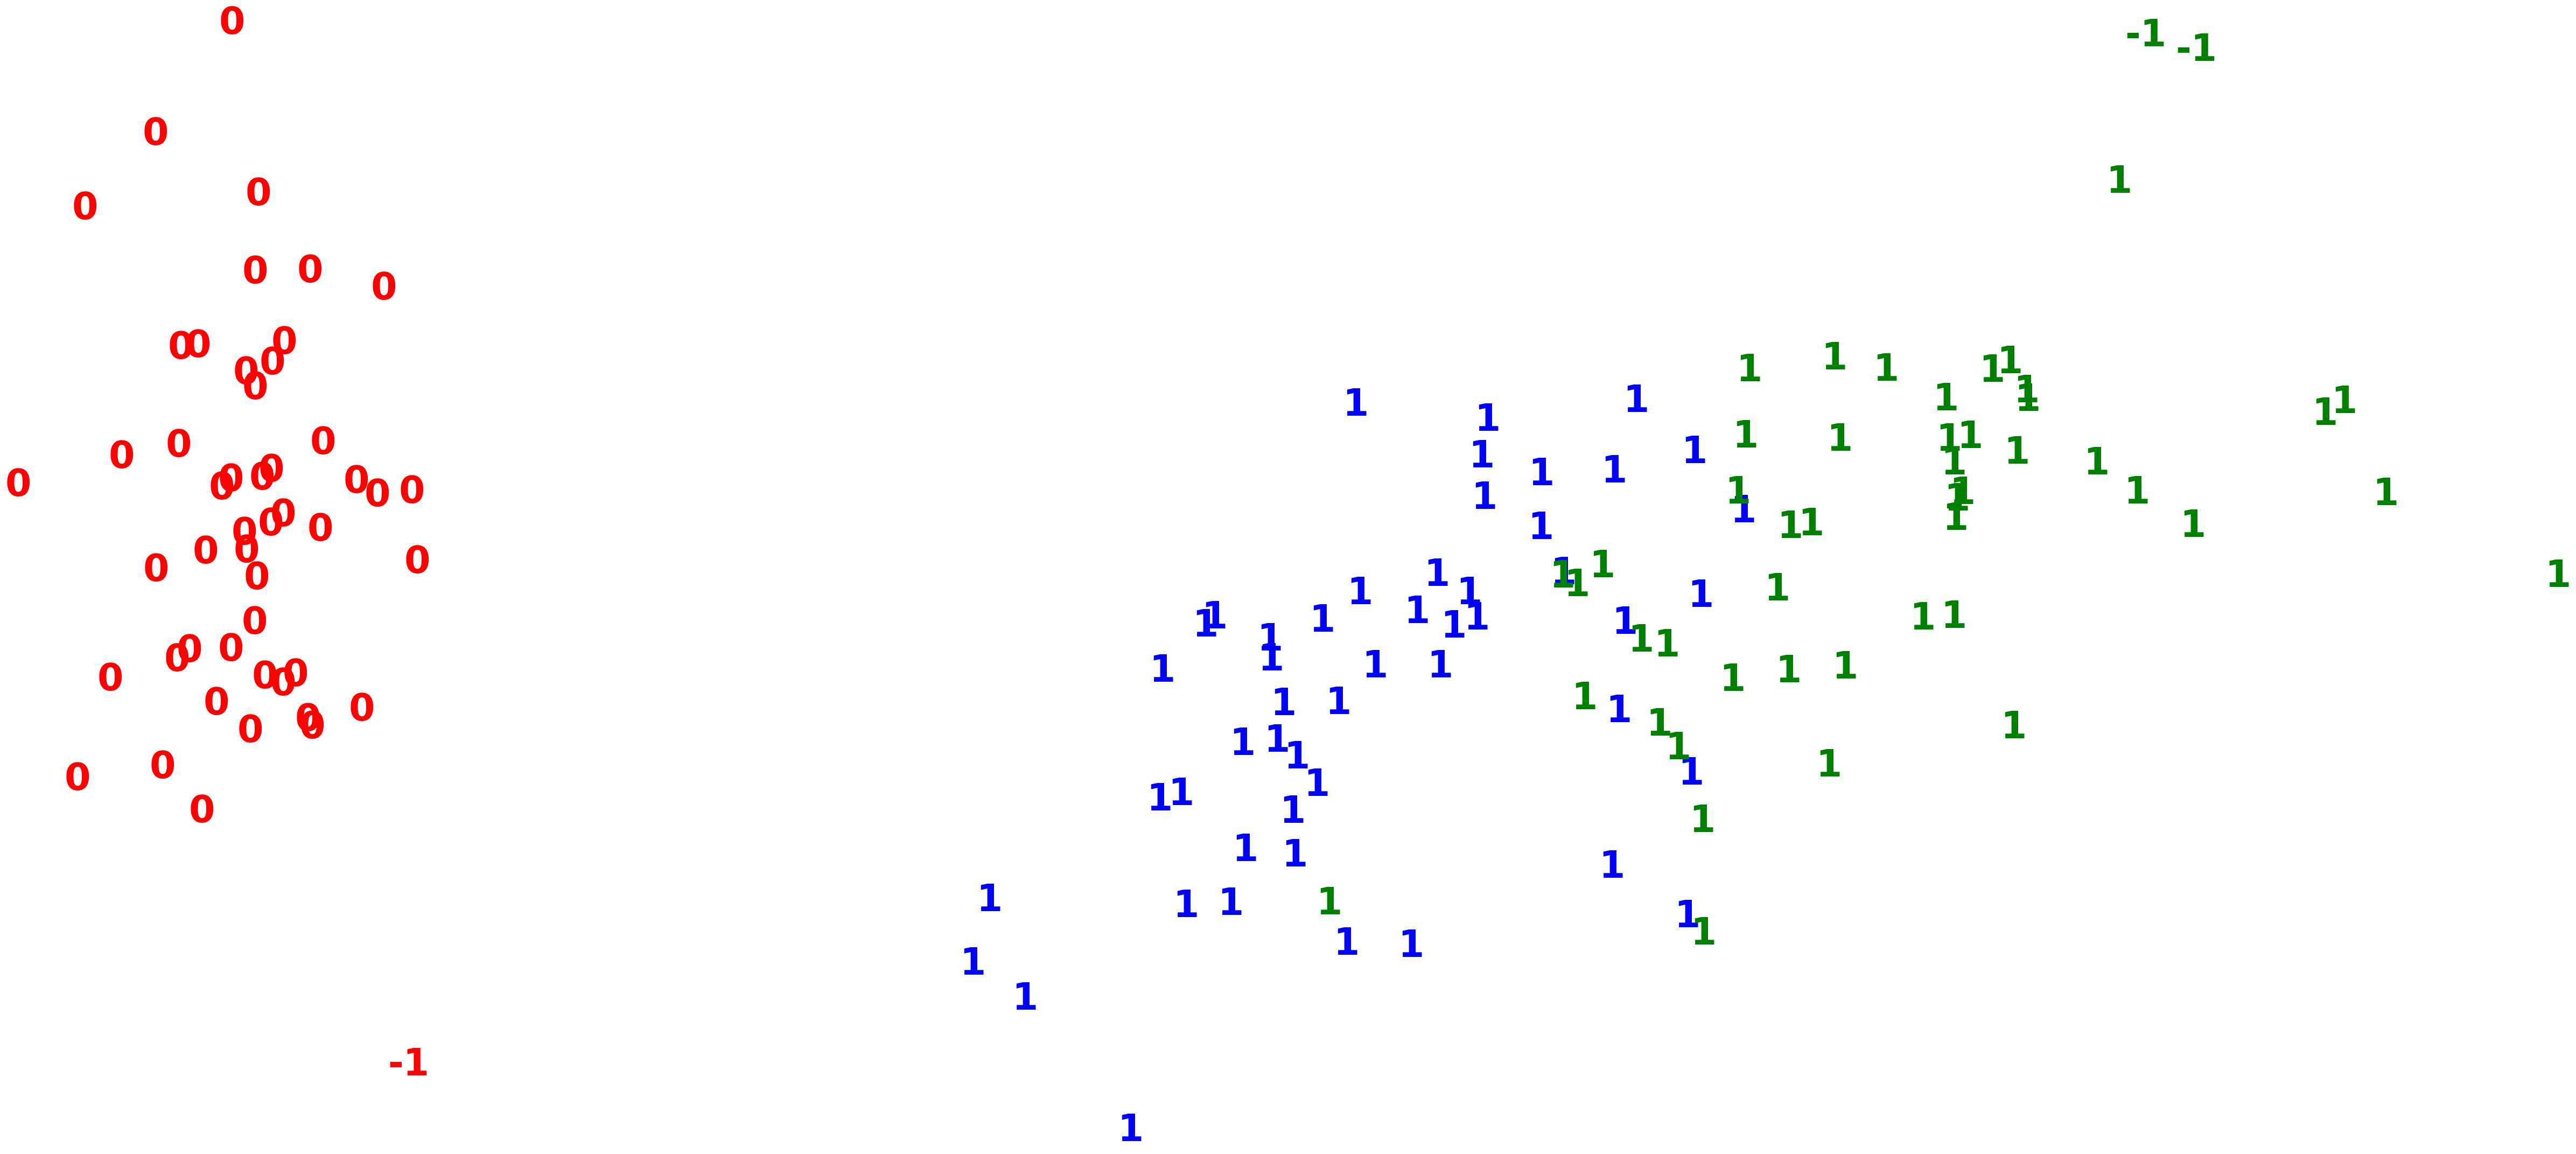

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

First of all, notice that in the graph above we see three cluster labels: 0, 1 and -1. Remember that DBSCAN can identify noise in data. All the observations we see labeled as -1 are actually noise and hence they don't belong to any cluster. So, when applying DBSCAN using scikit-learn, keep in mind that the observations that are labeled as -1 are noise and they don't belong to any cluster.

In the figure above, DBSCAN assigns all the observations into two clusters labeled 0 and 1. The three observations that are labeled as -1 are noise. Since we know that the Iris data includes three species, two clusters that DBSCAN discovers are not what we want. Actually, we see that DBSCAN couldn't distinguish between the two species that aren't linearly separable from each other. Hence, it performs worse than both k-means and hierarchical clustering. We can check this out by looking at the ARI score:

In [5]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.5535820784912958


The ARI score of DBSCAN solution is lower than those of the k-means and hierarchical clustering.

However, what if we don't know the ground truth for our data? Here, that would mean we didn't actually know there are three species of Iris data. In this case, we can look at the silhouette score:

In [6]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.5382884306788227


It turns out that the silhouette score of the DBSCAN solution is higher than those for both k-means and hierarchical clustering. Because of this, we should conclude that the DBSCAN solution is the better one, but we know that a good clustering method should come up with a three-cluster solution. How can this be possible?

This tension is indicative of the inherently challenging nature of clustering. The silhouette score measures the proximity of data points in a cluster to one another with respect to their proximity to datapoints in the nearest cluster. In the case of the Iris data, the observations of the linearly non-separable species lowers the silhouette score of the three cluster solution, and this is why we see that the silhouette score of the DBSCAN solution is higher than those of the k-means and hierarchical clustering solutions.

As you can see, by keeping our analysis limited to a single score, we risk deriving faulty conclusions. We should always try to understand the solution using the available information to us.